<a href="https://colab.research.google.com/github/nissan2ford/jupyter/blob/master/deeplearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive


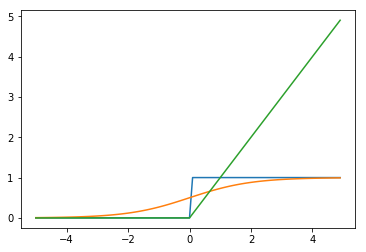

In [0]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
y3 = relu(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
#plt.ylim(-0.1, 1.1)
plt.show()

In [0]:
def identity_function(x):
  return x

def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return(network)

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)
  
  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


In [0]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)


[0.01821127 0.24519181 0.73659691]


1.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '..', '..', '/content/drive/deep-learning-from-scratch', '/content/drive/deep-learning-from-scratch', '/content/drive/deep-learning-from-scratch/dataset', '/content/drive/deep-learning-from-scratch/dataset', '/content/drive/deep-learning-from-scratch/dataset', '..', '..', '..', '..', '..', '..', '..', '..', '..', '../deep-learning-from-scratch/dataset', '..', '../deep-learning-from-scratch', '..', '../deep-learning-from-scratch', '..', '/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch', '/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch', '/conte

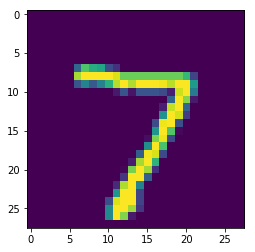

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import sys, os
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch')
!pwd
!ls


print(sys.path)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
  
  return x_test, t_test

def init_network():
  with open("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
    
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  
  return y

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

from PIL import Image

img = x[0]
label = t[0]
print(label)
print('before reshape = ' + str(img.shape))
img = img.reshape(28, 28)
print('afrer reshape = ' + str(img.shape))
plt.imshow(img)

print(x.shape)
print(t.shape)


In [21]:
import numpy as np

def mean_squared_error(y, t):
  return 0.5 * np.sum((y - t)**2)

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
  batch_size = y.shape[0]
  print(batch_size)
  delta = 1e-7
  return -np.sum(np.log(y[np.arange(batch_size), t] + delta)) / batch_size


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y), np.array(t)))


0.09750000000000003
1
23.718987110506905


NameError: ignored